In [3]:
import sys
sys.path.insert(0, '../../')
import pandas as pd
from tqdm import tqdm_notebook
from functools import partial
tqdm_notebook = partial(tqdm_notebook(leave=False))
tqdm_notebook(leave=False).pandas()

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [45]:
from lib.connect import get_connection 

connection = get_connection()
cursor = connection.cursor()

In [3]:
from lib.simple_qa import load_simple_qa 

df_train, = load_simple_qa(train=True)
df_train[:5]

,subject,relation,object,question
0,04whkz5,book/written_work/subjects,01cj3p,what is the book e about
1,0tp2p24,music/release_track/release,0sjc7c1,to what release does the release track cardiac...
2,04j0t75,film/film/country,07ssc,what country was the film the debt from
3,0ftqr,music/producer/tracks_produced,0p600l,what songs have nobuo uematsu produced?
4,036p007,music/release/producers,0677ng,Who produced eve-olution?


In [62]:
n_rows_train = df_train.shape[0]
cursor.execute("""
    SELECT COUNT(*)
    FROM fb_two_kg
""")
n_rows_kg = cursor.fetchone()[0]
print('KG Rows:', n_rows_kg)
print('Train Rows:', n_rows_train)

KG Rows: 14174246
Train Rows: 75910


In [66]:
from tqdm import tqdm_notebook

kg_probability = []
train_probability = []

# IDEAS:
# Given a subject appeared X times with R, then the different subject appeared 

for relation, train_count in tqdm_notebook(df_train.relation.value_counts().iteritems(), 
                                           total=df_train.relation.nunique()):
    train_probability.append(train_count / n_rows_train)
    cursor.execute("""
        SELECT COUNT(*)
        FROM fb_two_kg
        WHERE relation = %s
    """, (relation,))
    kg_count = cursor.fetchone()[0]
    kg_probability.append(kg_count / n_rows_kg)

HBox(children=(IntProgress(value=0, max=1629), HTML(value='')))

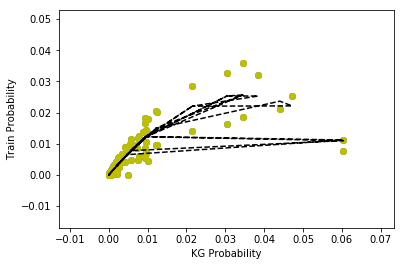

In [91]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(kg_probability, train_probability)

fit = np.polyfit(kg_probability, train_probability, deg=2)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(kg_probability, train_probability, 'yo', kg_probability, fit_fn(kg_probability), '--k')
plt.xlabel('KG Probability')
plt.ylabel('Train Probability')
# plt.xlim(0, 0.005)
# plt.ylim(0, 0.005)

plt.show()